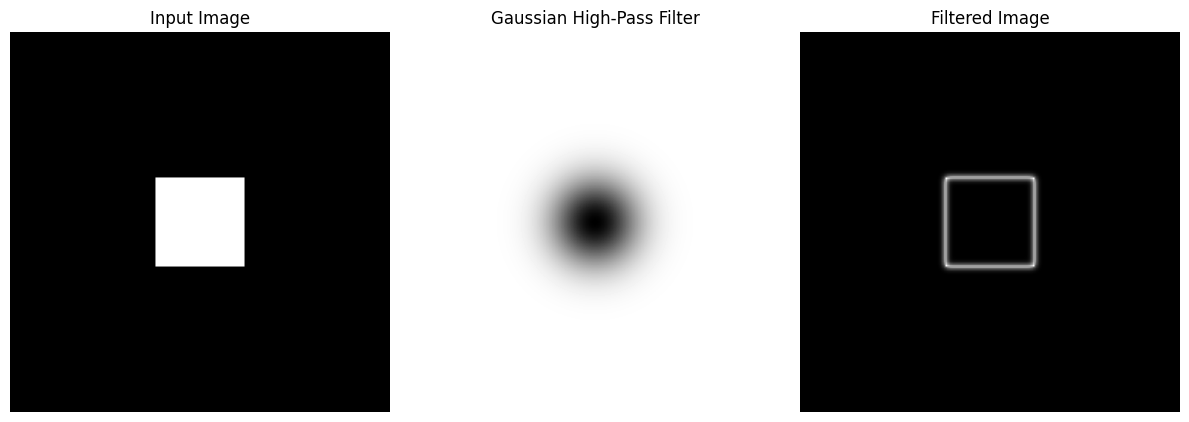

In [1]:

# Importing necessary libraries for image display and saving
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Define a function to generate a Gaussian high-pass filter
def gaussian_high_pass_filter(size, cutoff_frequency):
    """
    Create a Gaussian high-pass filter.
    :param size: Tuple of the filter size (rows, cols)
    :param cutoff_frequency: The cutoff frequency for the filter
    :return: Gaussian high-pass filter
    """
    rows, cols = size
    center_row, center_col = rows // 2, cols // 2

    # Create a grid of (x, y) coordinates
    x = np.linspace(-center_col, center_col, cols)
    y = np.linspace(-center_row, center_row, rows)
    X, Y = np.meshgrid(x, y)

    # Compute the Gaussian low-pass filter
    low_pass = np.exp(-(X**2 + Y**2) / (2 * (cutoff_frequency**2)))

    # Subtract from 1 to get a high-pass filter
    high_pass = 1 - low_pass

    return high_pass

# Apply the filter to an image in the frequency domain
def apply_filter(image, filter_kernel):
    """
    Apply a filter to an image in the frequency domain.
    :param image: Input grayscale image as a 2D array
    :param filter_kernel: Filter kernel as a 2D array
    :return: Filtered image as a 2D array
    """
    # Perform Fourier transform
    image_fft = np.fft.fft2(image)
    image_fft_shifted = np.fft.fftshift(image_fft)

    # Apply the filter in the frequency domain
    filtered_fft = image_fft_shifted * filter_kernel

    # Perform inverse Fourier transform
    filtered_fft_shifted = np.fft.ifftshift(filtered_fft)
    filtered_image = np.fft.ifft2(filtered_fft_shifted)
    filtered_image = np.abs(filtered_image)

    return filtered_image

# Create a sample input image
image_size = (256, 256)
image = np.zeros(image_size, dtype=np.float32)
cv = image_size[0] // 2
image[cv-30:cv+30, cv-30:cv+30] = 255  # Adding a white square at the center

# Create a Gaussian high-pass filter
cutoff_frequency = 20
filter_kernel = gaussian_high_pass_filter(image_size, cutoff_frequency)

# Apply the filter to the input image
filtered_image = apply_filter(image, filter_kernel)

# Plot the input and output images
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Input Image")
plt.imshow(image, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Gaussian High-Pass Filter")
plt.imshow(filter_kernel, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Filtered Image")
plt.imshow(filtered_image, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()
